In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
df.shape

(3075, 12)

In [26]:
df.groupby('Total Number of declines/day').count()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent,isFradulent_numeric,Isdeclined_numeric,isForeignTransaction_numeric,isHighRiskCountry_numeric,numberofdeclinesrange
Total Number of declines/day,,,,,,,,,,,,,,,
0,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384
1,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
2,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
3,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
4,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
5,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
6,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
7,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
8,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [6]:
df.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

In [7]:
df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

In [8]:
df = df.drop('Transaction date', axis = 1)

In [9]:
df.isFradulent.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: isFradulent, dtype: object

In [10]:
df['isFradulent_numeric'] = df.isFradulent.replace({'N': 0, 'Y': 1})

In [11]:
df['Isdeclined_numeric'] = df['Is declined'].replace({'N': 0, 'Y': 1})

In [12]:
df['isForeignTransaction_numeric'] = df['isForeignTransaction'].replace({'N': 0, 'Y': 1})

In [13]:
df['isHighRiskCountry_numeric'] = df['isHighRiskCountry'].replace({'N': 0, 'Y': 1})

In [14]:
df_type = df.groupby('isFradulent_numeric').isFradulent_numeric.count()

In [15]:
df_type

isFradulent_numeric
0    2627
1     448
Name: isFradulent_numeric, dtype: int64

C:\Users\Formation\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


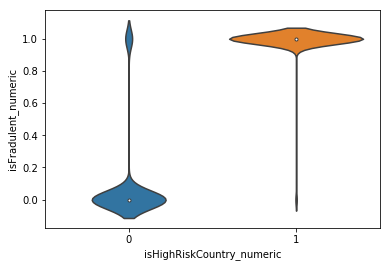

In [16]:
sns.violinplot(y='isFradulent_numeric', x='isHighRiskCountry_numeric', data=df)
plt.show()

In [18]:
bins = [0, 5, 10, 15, 20]
names = ['<5', '5-10', '11-15', '16-20', ]

bins = [0, 2, 18, 35, 65]
names = ['<2', '2-18', '18-35', '35-65', '65+']

d = dict(enumerate(names, 1))

df['numberofdeclinesrange'] = np.vectorize(d.get)(np.digitize(df['Total Number of declines/day'], bins))

In [21]:
df['numberofdeclinesrange'].isnull().sum()

0

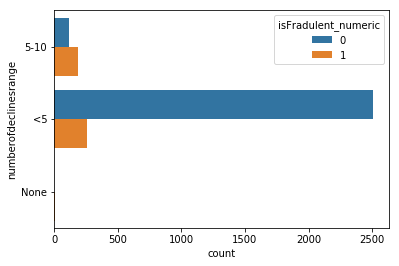

In [19]:
ax = sns.countplot(y="numberofdeclinesrange", hue="isFradulent_numeric", data=df)

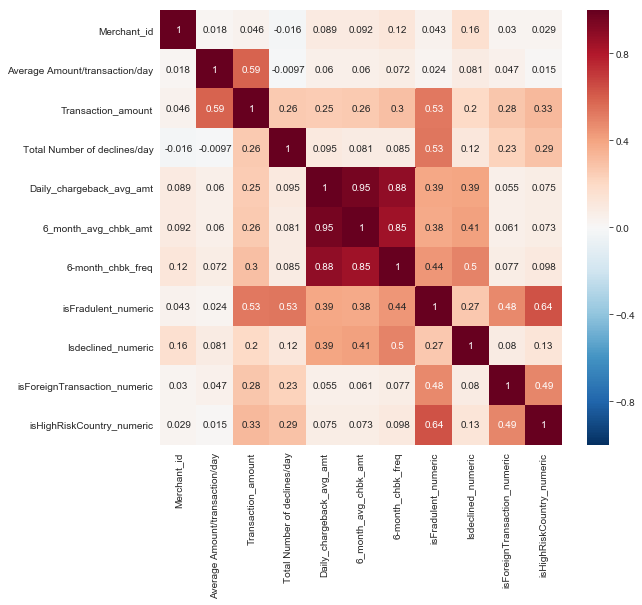

In [33]:
corr = df.corr()
sns.set_style('whitegrid')
plt.figure(figsize=(9,8))
sns.heatmap(corr,
           annot=True,
           cmap='RdBu_r',
           vmin=-1,
           vmax=1)
plt.show()